# Battery Health Regression Model

This notebook was inspired by this tweet: https://twitter.com/aria_ghora/status/1720023058575233318

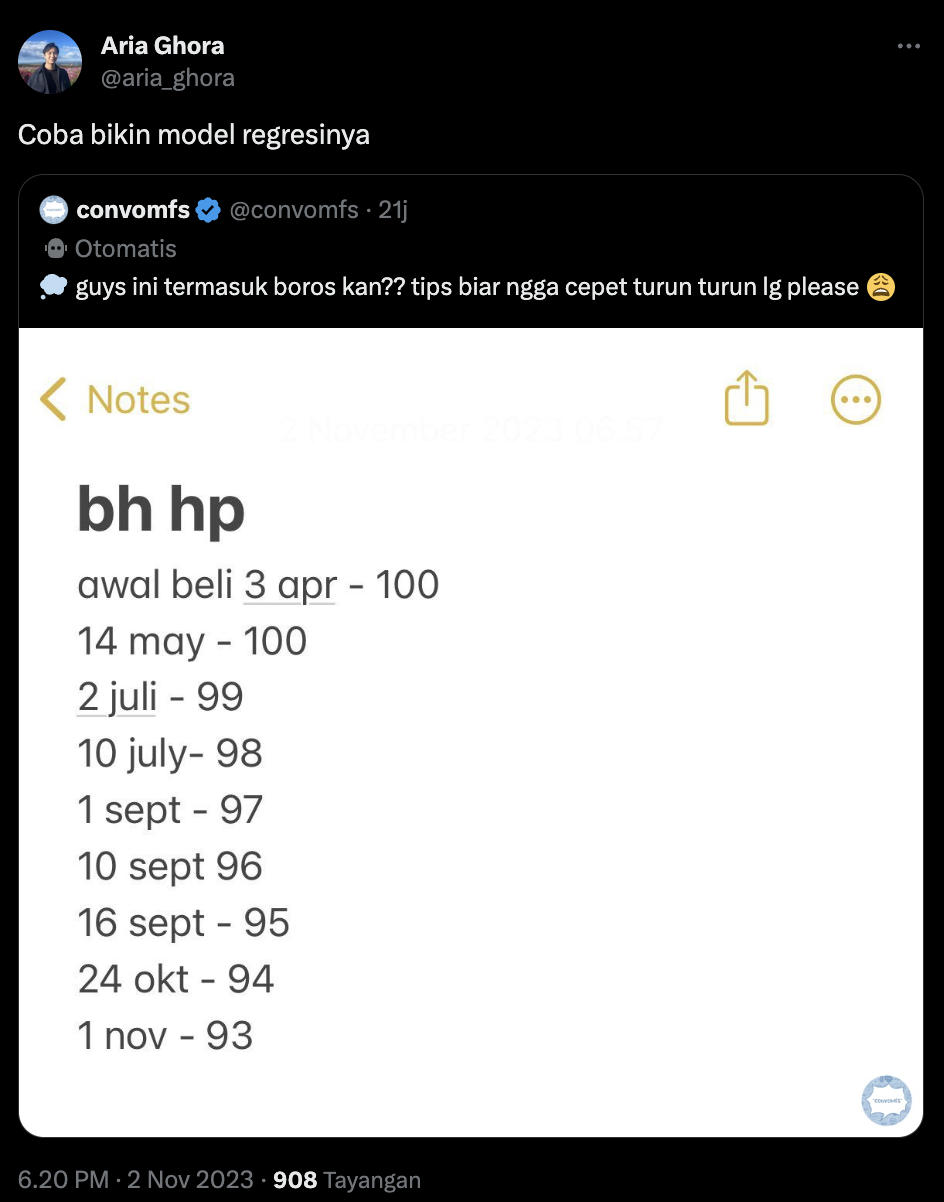

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:
#function to generate dummy date
def generate_dummy_date(start, end):
  return pd.date_range(start= start, end=end).to_list()

date = generate_dummy_date(start='2023-04-03', end='2023-11-01')

In [3]:
df = pd.DataFrame(date, columns=['date'])

In [4]:
data_from_twitter = {
'date': ['2023-04-03',
'2023-05-14',
'2023-07-02',
'2023-07-10',
'2023-09-01',
'2023-09-10',
'2023-09-16',
'2023-10-24',
'2023-11-01'],
'battery_health' : [100,100,99,98,97,96,95,94,93]
}

add_df = pd.DataFrame.from_dict(data_from_twitter)

add_df

,date,battery_health
0,2023-04-03,100
1,2023-05-14,100
2,2023-07-02,99
3,2023-07-10,98
4,2023-09-01,97
5,2023-09-10,96
6,2023-09-16,95
7,2023-10-24,94
8,2023-11-01,93


In [5]:
#cast data type to datetime
add_df['date'] = pd.to_datetime(add_df['date'])

In [6]:
# merge data date with data from twitter
clear_df = pd.merge(df, add_df, how='left')

In [7]:
clear_df

,date,battery_health
0,2023-04-03,100.0
1,2023-04-04,NaN
2,2023-04-05,NaN
3,2023-04-06,NaN
4,2023-04-07,NaN
...,...,...
208,2023-10-28,NaN
209,2023-10-29,NaN
210,2023-10-30,NaN
211,2023-10-31,NaN


In [8]:
clear_df.loc[clear_df['battery_health'].notnull()]

,date,battery_health
0,2023-04-03,100.0
41,2023-05-14,100.0
90,2023-07-02,99.0
98,2023-07-10,98.0
151,2023-09-01,97.0
160,2023-09-10,96.0
166,2023-09-16,95.0
204,2023-10-24,94.0
212,2023-11-01,93.0


Battery health data is similar to the screenshot picture above.

In [9]:
# to handle null values i used forward fill method, since based on the pattern the battery health always decrease not increase
fill = clear_df.fillna(method='ffill')

<Axes: xlabel='date', ylabel='battery_health'>

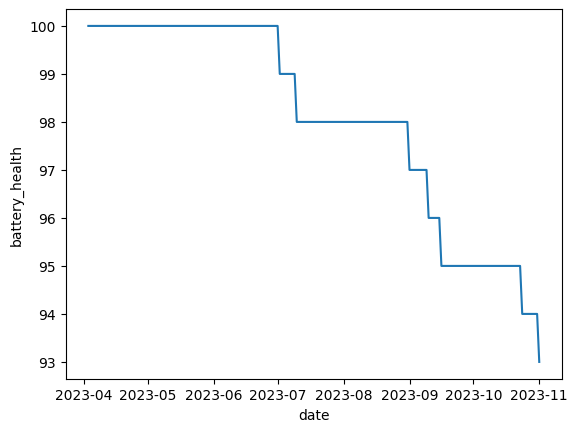

In [10]:
#plotting battery health, in X axis is date column and y axis is battery_health column
import seaborn as sns
sns.lineplot(data=fill, x='date', y='battery_health')

The pattern indicates that over time, the battery health consistently decreases.

In [11]:
#feature engineering
#assume 2023-04-03 is the first day observation
import numpy as np
fill["day"] = np.arange(0, len(fill))

In [12]:
fill

,date,battery_health,day
0,2023-04-03,100.0,0
1,2023-04-04,100.0,1
2,2023-04-05,100.0,2
3,2023-04-06,100.0,3
4,2023-04-07,100.0,4
...,...,...,...
208,2023-10-28,94.0,208
209,2023-10-29,94.0,209
210,2023-10-30,94.0,210
211,2023-10-31,94.0,211


In [13]:
#split the data, battery_health as target variable, and day as features variable
X = fill.loc[:, ['day']]  # features
y = fill.loc[:, 'battery_health']

In [14]:
# train the linear regression model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [15]:
#predict the battery health with the linear regression model
import warnings
days = 725
warnings.filterwarnings("ignore")
y_pred = model.predict([[days]])

print(f'Battery health prediction for day {days} is {round(y_pred[0], 0)}')

Battery health prediction for day 725 is 79.0


**Observations**: Apple give recomendations for changing an iphone battery if battery health < 80, based on model predictions the next battery changing is 725 days after 2023-04-03 which means the next battery replacement would be on March 28, 2025.

ps: indeed, individual usage patterns can vary, leading to different outcomes in battery health. It's all about how extensively they use their phones! Each user's experience can be unique.